# Quadratic fit through zero 
> Source:Template fit

## Physics 332 Analysis Assignment 2

Ahilan Kumaresan :)

This template is based on [A.1-Example-Fit.ipynb](https://gitlab.rcg.sfu.ca/jsdodge/data-analysis-python/blob/master/notebooks/A.1-Example-Fit.ipynb)

## Step 1: Import packages

In [82]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

## Step 2: Load the data
### Load the data: examine the format
Change the file name from `Example-Data.csv` to the name of the file containing your data.

In [83]:

# Display file contents
example_file = r"D:\Documents\SFU\PHYS382-AdvancedLab\phys332w-sfu-GIT\phys332W-sfu\LabLevel References\Reference-code\Python notebooks\Example-Data.csv"

"""
with open(example_file,'r') as file:
    for line in file:

        processed_line = line.strip() #
        all_lines_list = file.readlines()
"""

"\nwith open(example_file,'r') as file:\n    for line in file:\n\n        processed_line = line.strip() #\n        all_lines_list = file.readlines()\n"

In [84]:
"""# Display file contents
example_file = r"D:/Documents/SFU/PHYS382-AdvancedLab/phys332w-sfu-GIT/phys332W-sfu/LabLevel References/Reference-code/Python notebooks/Example-Data.csv"
file = open(example_file, 'r')
print(file.read())"""

'# Display file contents\nexample_file = r"D:/Documents/SFU/PHYS382-AdvancedLab/phys332w-sfu-GIT/phys332W-sfu/LabLevel References/Reference-code/Python notebooks/Example-Data.csv"\nfile = open(example_file, \'r\')\nprint(file.read())'

### Load the data: import the data into an array
Change the file name from `Example-Data.csv` to the name of the file containing your data and adjust the options to match your data file format.

### Part b)

Steps:

Set up your data as a NumPy array, where we make a list of x, y data and the sigma err

Define the model y = ax²

Use curve_fit with σ = 1 for all points

Extract â and σ_a



In [85]:
"""# Load file into array
data = np.genfromtxt(example_file, delimiter=',', skip_header = 1)
print("data =")
print(data)"""


y_data = [0.7,-0.5,0.4,1.6,7.6,13.7,18.0,25,33,39.6]
sigma = 1
data = []

for i in range(len(y_data)):
    data.append([i,y_data[i],sigma])

data = np.array(data)
print(data)

[[ 0.   0.7  1. ]
 [ 1.  -0.5  1. ]
 [ 2.   0.4  1. ]
 [ 3.   1.6  1. ]
 [ 4.   7.6  1. ]
 [ 5.  13.7  1. ]
 [ 6.  18.   1. ]
 [ 7.  25.   1. ]
 [ 8.  33.   1. ]
 [ 9.  39.6  1. ]]


Assign each column of `data` to the new variables for later use.

In [86]:
# Assign each array column to a separate array
# This works for np.array
x_values = data[:,0]
y_data = data[:,1]
err = data[:,2]
print("x values =", x_values)
print("y data =", y_data)
print("Errors = ", err)

x values = [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
y data = [ 0.7 -0.5  0.4  1.6  7.6 13.7 18.  25.  33.  39.6]
Errors =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Step 3: Plot the data
Change the variable names, title, axis labels, etc, as appropriate.

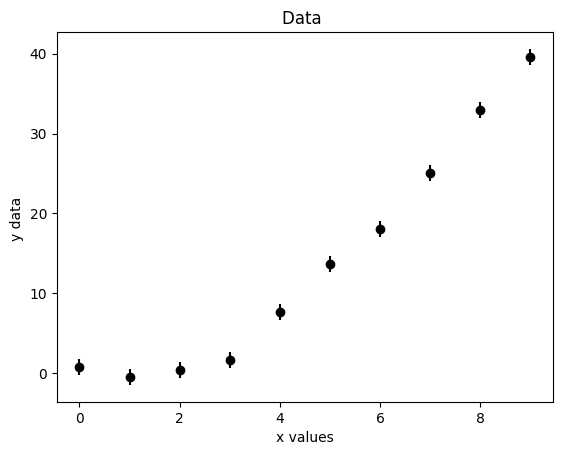

In [87]:
# Plot data
plt.errorbar(x_values,y_data,yerr=err,fmt='ko')

# Uncomment and revise the following lines to format plot
plt.xlabel('x values')
plt.ylabel('y data ')   
plt.title('Data ')

plt.show()

## Step 4: Define the model function
Revise to define your own model function.

In [88]:
# Define model function
def model(x,a):
    return a*x**2

## Step 5: Choose initial parameter values for the model
Select your initial parameters, select an appropriate range for your independent variable, and check that the resulting model curve is reasonably close to your data. Adust and repeat if they don't match.

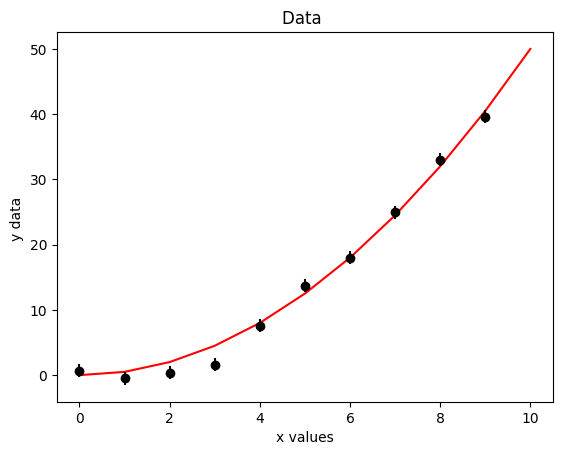

In [89]:
# Set initial parameters m0 and b0
aInit = 0.5
# Define new array, fModel, for displaying the model
xModel = np.linspace(0,10,10+1)

# Make the plot
# Recall the order of the arguments in the model definition, model(x,m,b):
plt.plot(xModel,model(xModel,aInit),'r-')
plt.errorbar(x_values,y_data,yerr=err,fmt='ko')

# Uncomment and revise the following lines to format plot
plt.xlabel('x values')
plt.ylabel('y data ')
plt.title('Data ')


# plt.xlim(0,120)
# plt.ylim(0,250)

plt.show()

## Step 6: Fit the model to the data
Change the variable names to the ones you have defined above. See the [help](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) for details on the `curve_fit` function.

In [90]:
# Fit the model to the data and display results
# The order of the parameter array elements p0, pOpt, and pCov
# are determined by their order [m,b] in the model definition, model(x,m,b):
pOpt, pCov = curve_fit(model,x_values,y_data,p0=[aInit],sigma=err,absolute_sigma=True)
print("[aOpt] =", pOpt)
print()
print("pCov =")
print(pCov)

[aOpt] = [0.50037175]

pCov =
[[6.52188094e-05]]


Assign the results of `curve_fit` to new variables.

In [91]:
# Assign results of curve_fit to new variables
aOpt = pOpt[0]
#bOpt = pOpt[1]
mAlpha = np.sqrt(pCov[0,0])
#bAlpha = np.sqrt(pCov[1,1])

#rho_mb = pCov[0,1]/(mAlpha)
# Correlation Coeffecients only make sence for multiple parameters yeah.


Display the variables. 

In [102]:
# Display formatted results at correct level of significance
# Adjust each format string as appropriate
print("Correctly formatted precision:")
print(f"Model a :     {aOpt:.2f} +/- {mAlpha:.2f}")

Correctly formatted precision:
Model a :     0.50 +/- 0.01


_Note that you should always round such parameter estimates and uncertainties to the appropriate number of significant figures!_

Follow the "golden rules" described in Sec. 2.9 of Hughes and Hase, adapted to the model-fitting context.

1. *If and only if the fit between a model and the data is good* (see below for methods to assess fit quality), the best estimate of a parameter is the one returned by the fit, and may be understood as the mean value of the distribution that you would get if you were to conduct the same experiment many times.
2. The error in each parameter is given by the square root of the associated diagonal element of the covariance matrix, and may be understood as the standard error for the parameter. Correlation coefficients between parameters may also be derived from the covariance matrix, using Eq. (7.30) in Hughes and Hase.
3. Round up the error for each parameter to the appropriate number of significant figures (usually just one, but sometimes more—see the discussion on p. 17 of Hughes and Hase, including Footnote #7).
4. Match the number of decimal places in the mean to the standard eror.
5. Include units.

## Step 7: Assess the fit
### Assessing the fit: visual inspection

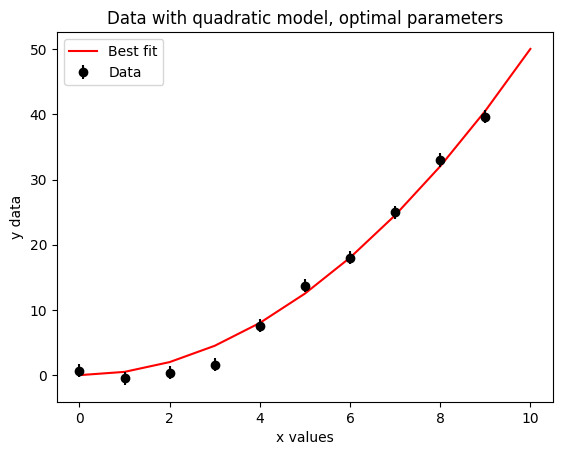

In [93]:
# Plot data with best-fit model (using aOpt, not aInit!)
plt.plot(xModel, model(xModel, aOpt), 'r-', label='Best fit')
plt.errorbar(x_values, y_data, yerr=err, fmt='ko', label='Data')

plt.xlabel('x values')
plt.ylabel('y data')
plt.title('Data with quadratic model, optimal parameters')
plt.legend()
plt.show()

### Part c)

### Assessing the fit: compute the $\chi^2$ statistic
Change the definition of `res` to match your dependent variable and model function.

In [94]:
# Compute and display chi-squared
res = y_data - model(x_values,aOpt)
normres = res/err
chisq = np.sum(normres**2)
print(f"chisq = {chisq:.1f}") # Adjust the format string as appropriate

chisq = 16.1


Compare to the number of statistical degrees of freedom.

In [95]:
# Compute and display DOF
Ndata = np.size(y_data)
Npar = np.size(pOpt)
dof = Ndata - Npar
print("dof =", dof)

dof = 9


In [96]:
# Is Chi2 in the range of dof +/- sqrt(2*dof)?
expected_range = [dof - np.sqrt(2*dof), dof + np.sqrt(2*dof)]  # renamed from 'range' to avoid overwriting built-in

if chisq > expected_range[0] and chisq < expected_range[1]:
    print("Yes, we are inside the range")
    print("This is a good fit!")
else:
    print("No, we are outside the range")
    print("This is NOT a good fit by this standard")

print()
print(f"Chi-squared: {chisq:.2f}")
print(f"Expected range: [{expected_range[0]:.2f}, {expected_range[1]:.2f}]")

No, we are outside the range
This is NOT a good fit by this standard

Chi-squared: 16.12
Expected range: [4.76, 13.24]


### Part d) 
Evaluate the significance of the fit quality.

In [97]:
# Part d) Chi-squared goodness of fit test at 5% significance
cdf = chi2.cdf(chisq, dof)
significance = 1 - cdf

print(f"Cumulative probability = {cdf:.4f}")
print(f"Significance = {significance:.4f} = {significance*100:.2f}%")
print()

# The fit passes if significance > 0.05 (5%)
if significance > 0.05:
    print("Since significance (6.4%) > 5%, the fit PASSES the chi-squared goodness of fit test.")
else:
    print("Since significance < 5%, the fit FAILS the chi-squared goodness of fit test.")

Cumulative probability = 0.9355
Significance = 0.0645 = 6.45%

Since significance (6.4%) > 5%, the fit PASSES the chi-squared goodness of fit test.


### Part e)

In [98]:
# Analytical formulas from part (a)
a_hat_analytical = np.sum(y_data * x_values**2) / np.sum(x_values**4)
sigma_a_analytical = sigma / np.sqrt(np.sum(x_values**4))

print(f"Analytical: a = {a_hat_analytical:.4f} +/- {sigma_a_analytical:.4f}")
print(f"curve_fit:  a = {aOpt:.4f} +/- {mAlpha:.4f}")

Analytical: a = 0.5004 +/- 0.0081
curve_fit:  a = 0.5004 +/- 0.0081


Yes they Match

### Part f) Linear fit with intercept

Redo the fit with model y = ax + b (two free parameters)

**Hey, Marker**, I feel like the way this is framed, I think this might actally mean y = ax^2 + b.. 
Just in case I will do part f again. 

**f1)**

In [99]:
# Part f) Define linear model with intercept: y = a*x + b
def linear_model(x, a, b):
    return a*x + b

# Fit the linear model
pOpt_linear, pCov_linear = curve_fit(linear_model, x_values, y_data, p0=[4, 0], sigma=err, absolute_sigma=True)
a_linear = pOpt_linear[0]
b_linear = pOpt_linear[1]

print(f"Linear fit: a = {a_linear:.4f}, b = {b_linear:.4f}")

# Calculate chi-squared for linear model
res_linear = y_data - linear_model(x_values, a_linear, b_linear)
chisq_linear = np.sum((res_linear/err)**2)
dof_linear = Ndata - 2  # Now 2 parameters

print(f"\nQuadratic model (y = ax^2): chi-squared = {chisq:.2f}, dof = {dof}")
print(f"Linear model (y = ax + b):  chi-squared = {chisq_linear:.2f}, dof = {dof_linear}")

Linear fit: a = 4.6236, b = -6.8964

Quadratic model (y = ax^2): chi-squared = 16.12, dof = 9
Linear model (y = ax + b):  chi-squared = 156.50, dof = 8


**f2)**

In [103]:
# Part f 2) Define linear model with intercept: y = a*x^2 + b
def linear_model(x, a, b):
    return a*x**2 + b

# Fit the linear model
pOpt_linear, pCov_linear = curve_fit(linear_model, x_values, y_data, p0=[4, 0], sigma=err, absolute_sigma=True)
a_linear = pOpt_linear[0]
b_linear = pOpt_linear[1]

print(f"Linear fit: a = {a_linear:.4f}, b = {b_linear:.4f}")

# Calculate chi-squared for linear model
res_linear = y_data - linear_model(x_values, a_linear, b_linear)
chisq_linear = np.sum((res_linear/err)**2)
dof_linear = Ndata - 2  # Now 2 parameters

print(f"\nQuadratic model (y = ax^2): chi-squared = {chisq:.2f}, dof = {dof}")
print(f"Linear model (y = ax^2 + b):  chi-squared = {chisq_linear:.2f}, dof = {dof_linear}")

Linear fit: a = 0.5142, b = -0.7455

Quadratic model (y = ax^2): chi-squared = 16.12, dof = 9
Linear model (y = ax^2 + b):  chi-squared = 13.50, dof = 8


No, Chi-sqare for Linear Model is Higher in f1.


Yes, Chi-sqare for Linear Model is lower in f2. 

Why fitting two parameters is NOT a good idea in this case:

Although the chi-squared is lower with two parameters, this is NOT necessarily better because:

1. We are told y = ax^2 based on theory. So the new constant might not be accurate

2. Adding more parameters will ALWAYS reduce chi-squared (or keep it the same), but this doesn't mean the model is better. We're just fitting noise. With more parameters, we have fewer degrees of freedom (dof = 8 instead of 9), which makes the chi-squared comparison misleading.
3. We are told in class too that the approch should be, we make the most simplest and first model and use that, after that even if we lower the chi-sqared we shouold not take that approach. 


---

### Assessing the fit: plot the (normalized) residuals
Finally, we can check for statistical consistency by confirming that the residuals do not show any systematic pattern. In this example, the uncertainty in two of the measurements is much larger than the others, so the residual plot is overwhelmed by the deviations at these points, as seen below.

The following cell uses the PyPlot `stem` routine to produce the residual plot, which often shows deviations from the zero line more effectively than a regular scatterplot.

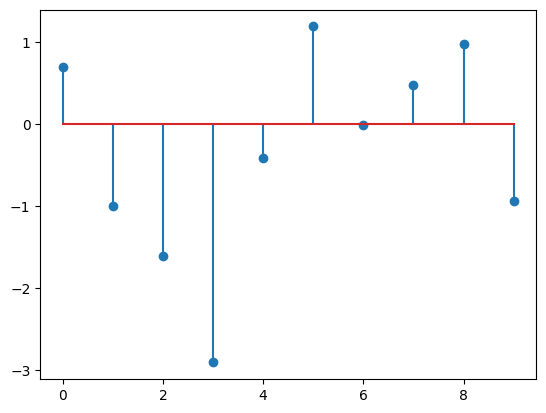

In [100]:
# Show residuals
plt.stem(x_values,res) # Setting use_line_collection=True avoids a warning in Matplotlib 3.1

# Uncomment and revise the following lines to format plot
# plt.xlabel('x_values (Hz)')
# plt.ylabel('Residual (mV)')
# plt.title('Fit residuals')
# plt.xlim(0,120)

plt.show()

By plotting the normalized residuals, we can see that the large deviations at 50 Hz and 100 Hz are not unexpectedly large, and that the overall pattern of deviations is consistent with random fluctuations.

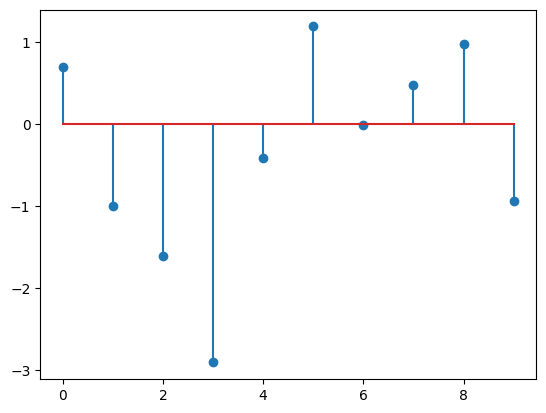

In [101]:
# Show normalized residuals
plt.stem(x_values,normres) # Setting use_line_collection=True avoids a warning in Matplotlib 3.1

# Uncomment and revise the following lines to format plot
# plt.xlabel('x_values (Hz)')
# plt.ylabel('Residual (mV)')
# plt.title('Fit residuals')
# plt.xlim(0,120)

plt.show()

## Step 8: Decide what to do next
Ideally you will get to the end of this whole process and find that the model fits the data well, and you can report your results with confidence. If time allows, you might even go back and take more data to improve the precision of your parameter estimates. But what happens if your $\chi^2$ statistic is too big or too small, or if the normalized residuals do not appear random? If that's the case, you have a few options:

* Look for defects in your experimental procedure, including the procedure you used to prepare the raw data for analysis (ie, incorrect unit conversion).
* Consider a different model. This may include changes that are based on physical reasoning, such as eliminating approximations to make it more realistic, or purely empirical, such as adding a constant background, or an extra term in a polynomial fit. The residuals should provide guidance on how to change the functional relationship to improve agreement. Just don't overdo it: if you find yourself needing to add many arbitrary fit parameters to achieve a good fit, that is usually a sign that you need to consider a different approach.
* Consider restricting your fit to a narrower range of measurements (i.e., focus on limiting values of $x$ and/or $y$, or on the heights, widths and locations of peaks instead of their detailed shape).
* Consider rescaling the uncertainties, as described in Sec. 8.9 of Hughes and Hase (though note their "health warning" in Footnote 9).
* Accept that you may be unable to remove all sources of systematic error in the given time, and do your best to make a quantitative estimate of your parameter uncertainties in light of them. You don't have to throw all of your data away just because you don't have a model that fits it well.